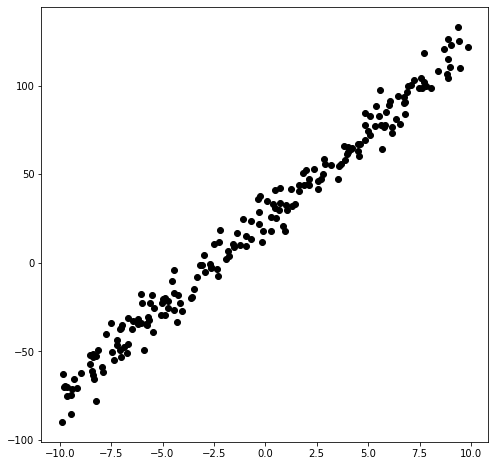

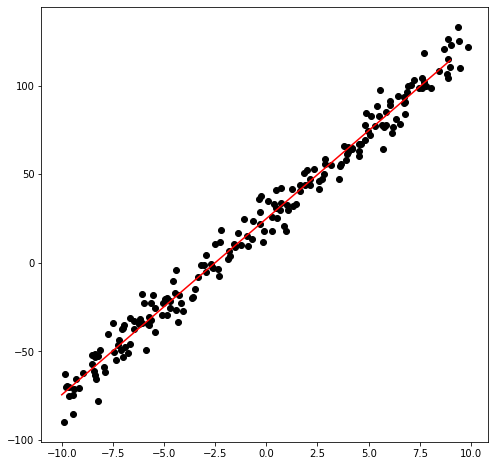

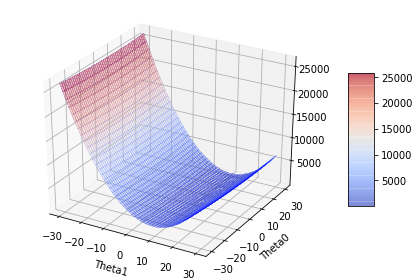

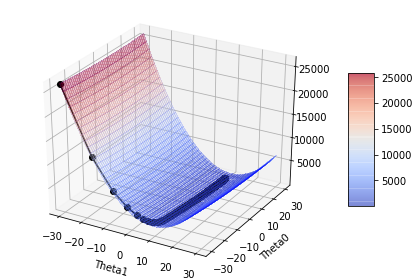

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import copy



# cost function
def compute_cost(theta, x, y):
  m=float(len(y))
  prediction=theta[0]+theta[1]*x
  J=(1/2)*(1/m)*(np.sum(np.square(prediction-y)))
  return J

  
# get theta, theta_history, J_history
def compute_theta(theta, data_x, data_y, num):
  n = float(len(data_x))
  J_history=[]
  theta_history=[]
  
  J_history.append(compute_cost(theta,data_x,data_y))
  theta_history.append(copy.deepcopy(theta))

  for i in range(num):
    prediction=theta[1]*data_x+theta[0]
    loss=prediction - data_y
    t0 = alpha*(1/n)*np.sum(loss)
    t1 = alpha*(1/n)*np.sum(loss*data_x)
  

    theta[0]-=t0
    theta[1]-=t1

    J_history.append(compute_cost(theta,data_x,data_y))
    theta_history.append(copy.deepcopy(theta))

  return theta, theta_history, J_history


#draw cost function
def draw_J(theta0range, theta1range, x, y):
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.set_xlabel("Theta1")
  ax.set_ylabel("Theta0")

  X=np.arange(theta0range[0],theta0range[1],theta0range[2]) 
  Y=np.arange(theta1range[0],theta1range[1],theta1range[2])

  Z = np.zeros((len(Y),len(X)))

  temp=[]

  for i in range(len(Y)):
    for j in range(len(X)):
      temp.append(Y[i])
      temp.append(X[j])
      Z[i][j]= compute_cost(temp, x_data, y_data)
      temp.clear()

  X,Y = np.meshgrid(X, Y)

  surf = ax.plot_surface(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False, alpha = 0.3)
  wire = ax.plot_wireframe(X,Y,Z,color='blue',linewidth=0.1)
  fig.colorbar(surf,shrink=0.5,aspect=5)
  fig.tight_layout()
  
  
  return fig

#draw optimization path
def draw_GD(theta_history, J_history, theta0range, theta1range, x_data, y_data):
  
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.set_xlabel("Theta1")
  ax.set_ylabel("Theta0")

  X=np.arange(theta0range[0],theta0range[1],theta0range[2]) 
  Y=np.arange(theta1range[0],theta1range[1],theta1range[2])

  Z = np.zeros((len(Y),len(X)))

  temp=[]

  for i in range(len(Y)):
    for j in range(len(X)):
      temp.append(Y[i])
      temp.append(X[j])
      Z[i][j]= compute_cost(temp, x_data, y_data)
      temp.clear()

  
  X,Y = np.meshgrid(X, Y)
  
  surf = ax.plot_surface(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False, alpha = 0.3)
  wire = ax.plot_wireframe(X,Y,Z,color='blue',linewidth=0.1)
  fig.colorbar(surf,shrink=0.5,aspect=5)
  fig.tight_layout()

  x=[]
  y=[]

  for i in range(len(theta_history)):
    x.append(copy.deepcopy(theta_history[i][0]))
    y.append(copy.deepcopy(theta_history[i][1]))
  z=J_history

  
  ax.plot(y,x,z,c='black',marker='o')
  return fig



# 데이터 불러오기
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black')
plt.show()


#y = Theta0 + Theta1 * x
theta=[-30, -30]
alpha=0.01
num=3000

theta, theta_h, cost_h = compute_theta(theta, x_data, y_data, num)



plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c='black')
w = range(-10, 10)
q = [theta[1]*v+theta[0] for v in w]
plt.plot(w, q, c='red')
plt.show()

#cost 함수의 범위 : [시작값, 끝값, 증가값]
theta0range=[-30, 30, 0.1]
theta1range=[-30, 30, 0.1]

fig = draw_J(theta0range, theta1range, x_data, y_data)
fig.show()
fig2 = draw_GD(theta_h, cost_h, theta0range, theta1range, x_data, y_data)
fig2.show()
